<a href="https://colab.research.google.com/github/cassyrr/Insurance-Cost-Analysis/blob/main/Insurance_Cost_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting Insurance Cost

#### Objectives:

- For an insurance company to thrive, it must effectively balance the collection of yearly premiums with the expenses incurred in providing medical care to its beneficiaries. Consequently, insurers invest substantial resources in developing models that accurately forecast medical expenses.

- This project focuses on estimating the average medical care expenses based on a variety of patient attributes. The goal is to provide reliable estimates that can contribute to the development of actuarial tables. Actuarial tables play a crucial role in setting the pricing of yearly premiums, adjusting them higher or lower depending on the anticipated treatment costs.


#### 1. About Dataset

- The dataset is obtained from Kaggle: https://www.kaggle.com/datasets/willianoliveiragibin/healthcare-insurance/data

- This dataset contains information on the relationship between personal attributes (age, gender, BMI, family size, smoking habits), geographic factors, and their impact on medical insurance charges. It can be used to study how these features influence insurance costs and develop predictive models for estimating healthcare expenses.

- Variables:

  Age: The insured person's age.

  Sex: Gender (male or female) of the insured.

  BMI (Body Mass Index): A measure of body fat based on height and weight.

  Children: The number of dependents covered.

  Smoker: Whether the insured is a smoker (yes or no).

  Region: The geographic area of coverage.

  Charges: The medical insurance costs incurred by the insured person.

#### 2. Exploratory Data Analysis (EDA)

Objectives:

- Overview of dataset
- Data Cleaning
- Distribution & Correlation

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

(1) Overview of Dataset & Data Cleaning

In [2]:
# Upload dataset and display the dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/cassyrr/Insurance-Cost-Analysis/main/insurance.csv")

insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* "sex", "smoker", "children", and "region" are categorical data.

In [3]:
# size of the dataset
insurance.shape

(1338, 7)

In [4]:
# data types
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* The dataset contains 1,338 datapoints and 7 variables.


In [5]:
# Check missing values
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# check distribution and any noise values
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**Summary:**
The dataset is clean and ready for further analysis as there are no missing values or unusual outliers.

(2) Distribution & Correlation

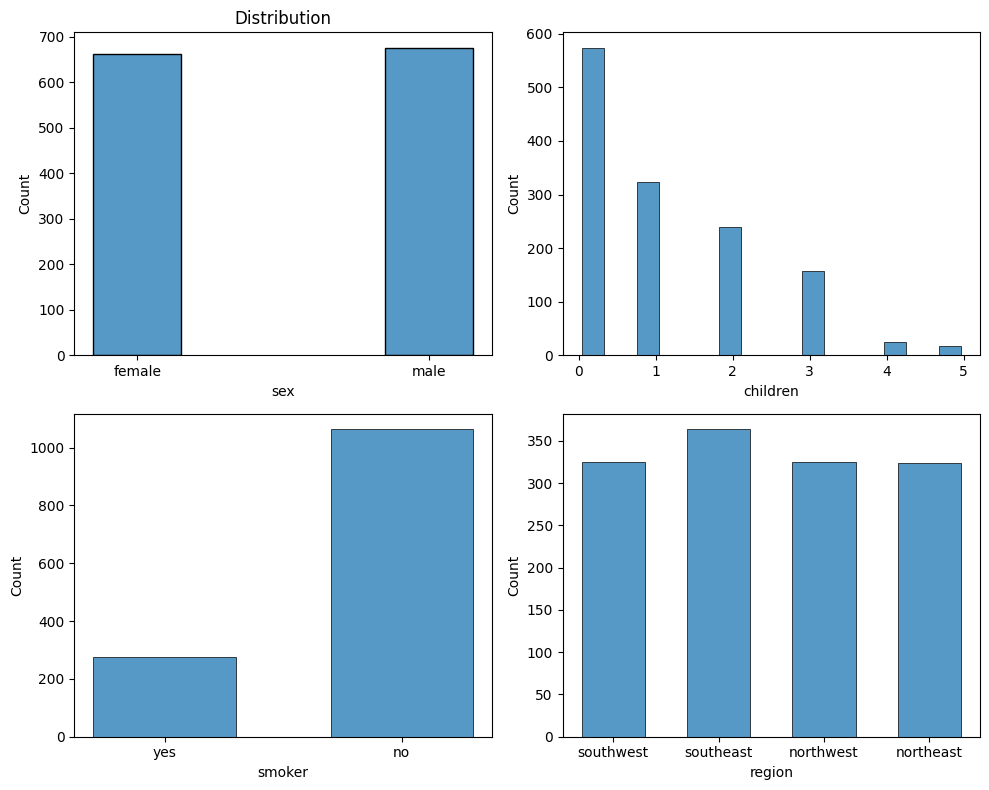

In [7]:
# Distribution of Categorical Features

g,ax = plt.subplots(2,2, figsize=(10,8))

sns.histplot(insurance, x= 'sex', shrink = 0.3, ax = ax[0][0])
ax[0,0].set_title('Distribution')

sns.histplot(insurance, x= 'children', shrink = 0.8, ax = ax[0][1], linewidth = 0.5)

sns.histplot(insurance, x= 'smoker', shrink = 0.6, ax = ax[1][0], linewidth = 0.5)

sns.histplot(insurance, x= 'region', shrink = 0.6, ax = ax[1][1], linewidth = 0.5)

plt.tight_layout()
plt.show()

* For the distribution for 4 categorical features:

There are almost the same counts for male and female;

The majority of people in this dataset does not have children;

The majority of people in this dataset does not smoke;

There are almost the same counts for each of 4 regions.



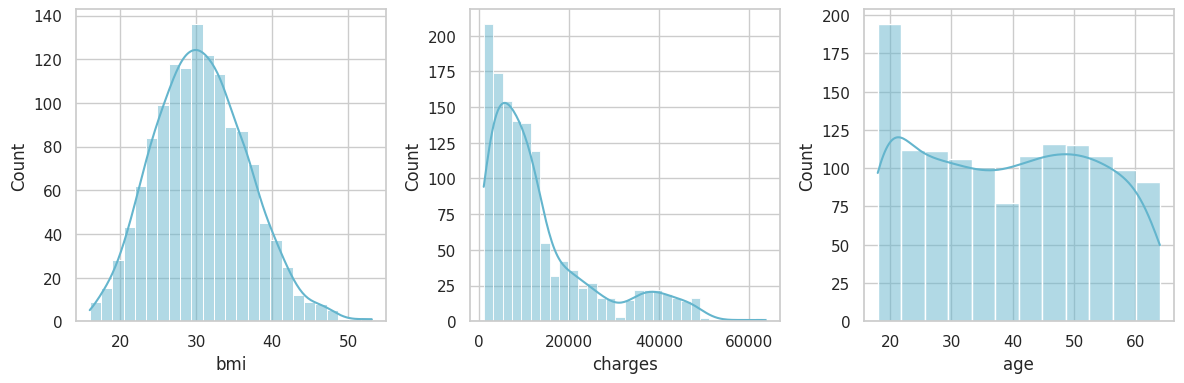

In [8]:
# distribution of continous variables

sns.set(style='whitegrid')
g, ax = plt.subplots(1,3, figsize=(12,4))

sns.histplot(insurance['bmi'], kde = True, color = 'c', ax = ax[0])
sns.histplot(insurance['charges'], kde = True, color = 'c', ax = ax[1])
sns.histplot(insurance['age'], kde = True, color = 'c', ax = ax[2])


plt.tight_layout()
plt.show()

* The BMI distribution is approximately normal with a center around 30.

* The charges exhibit a right-skewed distribution, suggesting a potential need for transformation before applying regression algorithms due to a violation of assumptions.

* The age distribution highlights 20-year-olds as the predominant age group in the dataset, and the number of individuals in each age group remains relatively consistent.

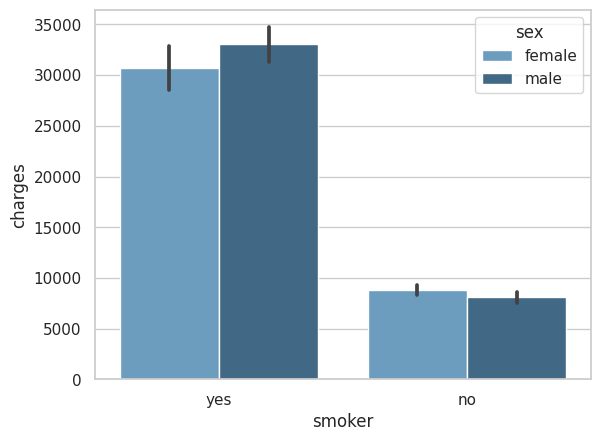

In [9]:
# Correlation among variables

# male vs. female vs. smoke

sns.barplot(x = 'smoker', y = 'charges', hue = 'sex', data = insurance, palette = 'Blues_d')
plt.show()

* In general, smokers are paying higher medical chargers and there is little differences among genders.

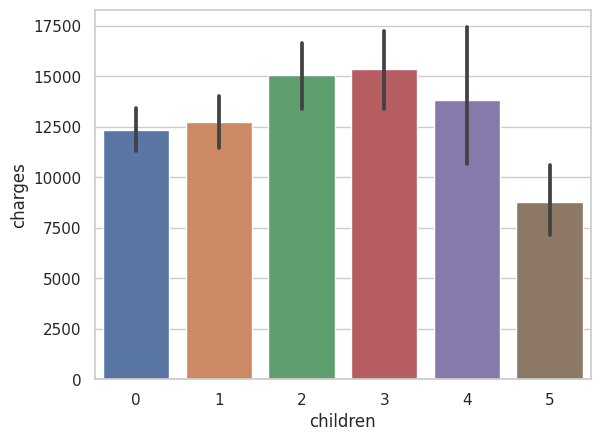

In [10]:
# number of children vs. charges

sns.barplot(x = 'children', y = 'charges', data = insurance)
plt.show()

* The graph indicates that having more children does not necessarily result in higher charges."

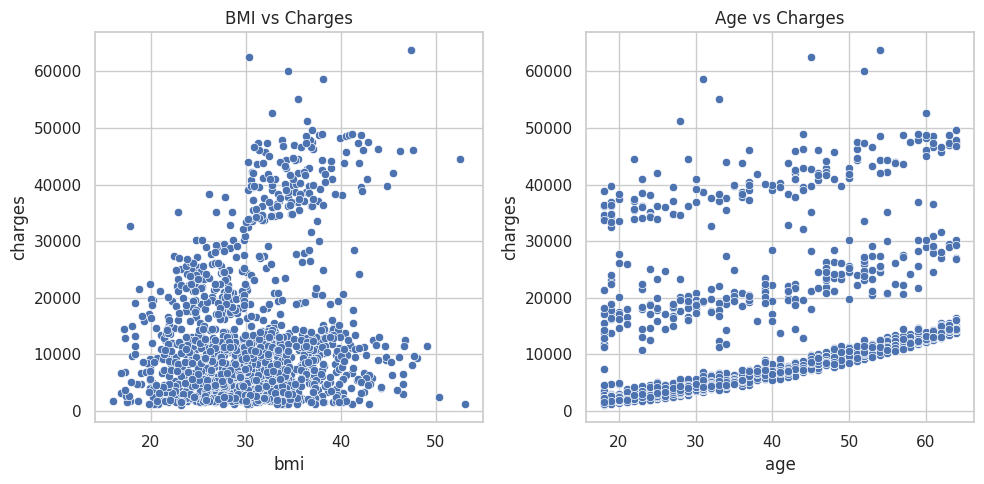

In [11]:
# bmi vs charges, age vs charges

g, ax = plt.subplots(1,2, figsize=(10,5))

# Plot 1: BMI vs Charges
sns.scatterplot(x=insurance['bmi'], y=insurance['charges'], ax=ax[0])
ax[0].set_title('BMI vs Charges')

# Plot 2: Age vs Charges
sns.scatterplot(x=insurance['age'], y=insurance['charges'], ax=ax[1])
ax[1].set_title('Age vs Charges')

plt.tight_layout()
plt.show()

* Upon examination of the graph, the correlation between BMI and charges does not exhibit a strong directional relationship. However, in the case of age and charges, a positive correlation is evident, suggesting that older individuals tend to incur higher medical charges.

In [12]:
# encode the categorical variables for finding out correlation and implementing algorithm later
from sklearn.preprocessing import LabelEncoder

def encode_category(df):
  label_encoder = LabelEncoder()
  df['sex'] = label_encoder.fit_transform(df['sex'])
  df['smoker'] = label_encoder.fit_transform(df['smoker'])
  df['region'] = label_encoder.fit_transform(df['region'])
  return df

encode_category(insurance)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


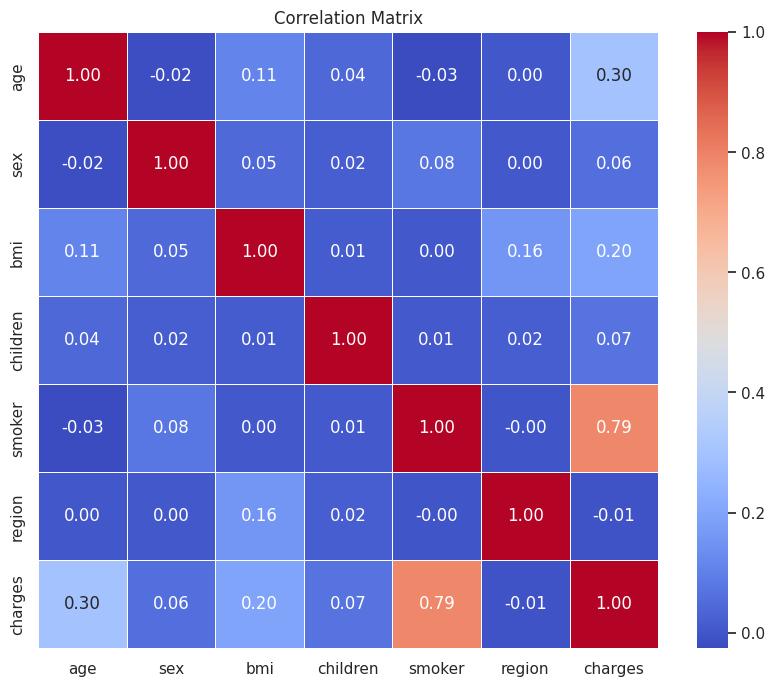

In [13]:
# Correlation among all variables
correlation_matrix = insurance.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


* By Examining the correlation matrix, it reveals that all factors exhibit a positive correlation with charges, except for region, which demonstrates a weak negative correlation with charges.

* Notably, the "smoker" variable demonstrates the strongest correlation with charges, indicating that smokers generally incur higher medical charges.

* On average, the correlations among features are low, typically below 0.1.

#### 3. Machine Learning Model Training

#### Objectives:

- Check for Assumptions for Linear Regression
- Model Training
- Model Testing



(1) Check for Assumptions

* Linearity -> features vs. target
* Normal Distribution of Residuals
* Less or No Multicollinearity -> features are not highly correlated to each other
* Auto Correlation -> error terms are independent to each other
* Homoscedasticity -> residuals have constant variance

* Linearity: Evaluating the linearity assumption is challenging when dealing with a mix of continuous and categorical variables. However, the observed correlations between all features and the target variable suggest a potential linear relationship. For simplicity, I will assume linearity between the features and the target.

* Multicollinearity: Examination of the correlation matrix indicates low correlations among features, typically below 0.1. This suggests that the assumption of minimal multicollinearity is met.

* Autocorrelation: Assessing autocorrelation requires the computation of residuals using predicted values, which can only be done after training the model. I plan to check autocorrelation post-model training, optimizing the model accordingly.

* Normal Distribution & Homoscedasticity: The distribution of the target variable exhibits a right-skewed shape. To address this, I intend to implement transformations to approximate a normal distribution and promote homoscedasticity, ensuring a more consistent variance across the data.


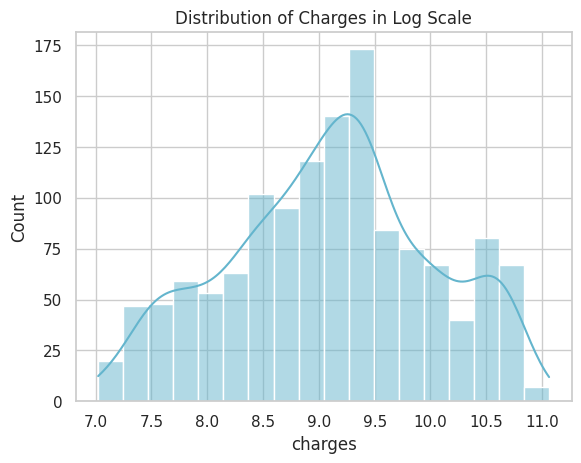

In [15]:
# Taking natrual log to target variable for transformation

ax = sns.histplot(np.log(insurance['charges']), kde = True, color = 'c')
plt.title('Distribution of Charges in Log Scale')
plt.show()

* The distribution of target variable is approximate normal after taking natrual logrithm.

* Here are few reasons:

In linear regression, a constant variance is one of the assumption. So, by taking the log of the variable, we compress the larger values more than the smaller ones, helping to stabilize the variance across the range of the variable.

Another assumption for linear regression is linear relationship between inputs and output, Taking the log of the dependent variable can transform a curved relationship into a straight-line relationship, making it easier to model using linear regression.

(2) Training and Evaluating Linear Regression Model

* Objective: Utilize personal data of individuals to predict their medical charges.

* Target: "charges"

* Features: "age","bmi","children","smoker","sex",and "region"

In [27]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Build model training and testing method

def Linear_training (X,y):
  # define model
  lin_reg = LinearRegression()

  # split train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0, test_size=0.2)

  # fit the model
  lin_reg.fit(X_train, y_train)

  # Coefficient & Intercept

  for i, name in enumerate(X.columns):
      print(f'{name}:{lin_reg.coef_[i]}')

  print("Intercept ->", lin_reg.intercept_)

  # Evaluate MSE and R2
  y_predict = lin_reg.predict(X_test)

  print(f'MSE:{mean_squared_error(y_predict, y_test)}')
  print(f'R2:{r2_score(y_predict, y_test)}')

  return lin_reg

In [32]:
# define X and y
X = insurance.drop(['charges'], axis = 1)
y = np.log(insurance['charges'])

# fit training method
Linear_training(X,y)

age:0.03477687963794887
sex:-0.05255594246680966
bmi:0.012993320475917627
children:0.09900369327548045
smoker:1.5572842484778857
region:-0.04341353354645359
Intercept -> 7.003988438889826
MSE:0.1771569472744039
R2:0.7428582773606277


LinearRegression()

* Upon training and testing the model with the dataset, I obtained a mean squared error of 0.177 and an R2 score of 0.74. This implies that 74% of the variance in the target variable can be explained by the features included in the model.